# Features reduction

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
# fetch dataset automobile from UCI Machine Learning Repository
automobile = fetch_ucirepo(id=10) 
# data (as pandas dataframes) 
features = automobile.data.features 
targets = automobile.data.targets 

df = pd.concat([features, targets], axis=1) # I join features and targets for cleaning
df = df.dropna().drop_duplicates() # Remove rows with NaN or duplicates
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# num conversion
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

df = pd.get_dummies(df, drop_first=True)
df = df.astype(float)

X = df.values
X.shape

# I did not keep y as a target. I just used the dataset to reduce the size

(159, 52)

In [3]:
df.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,...,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
3,13950.0,30.0,24.0,5500.0,102.0,10.0,3.4,3.19,109.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17450.0,22.0,18.0,5500.0,115.0,8.0,3.4,3.19,136.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17710.0,25.0,19.0,5500.0,110.0,8.5,3.4,3.19,136.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,23875.0,20.0,17.0,5500.0,140.0,8.3,3.4,3.13,131.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,16430.0,29.0,23.0,5800.0,101.0,8.8,2.8,3.50,108.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Implementation from scratch

In [4]:
import numpy as np

class PCA_from_scratch:
    def __init__(self, n_components):
        self.n_components = n_components  # Number of dimensions we want to project the data onto
        self.components = None  # Selected eigenvectors
        self.mean = None  # Mean of each feature (column)
        self.explained_variance = None  # Explained variance to be used for plotting or analysis

    def fit(self, X):  # Only X is needed since PCA is unsupervised and doesn't use labels
        self.mean = np.mean(X, axis=0)  # Compute the mean of each column
        X = X - self.mean  # Center the data
        cov = np.cov(X.T)  # Compute the covariance matrix (transpose because we want cov between features)
        eigenvalues, eigenvectors = np.linalg.eig(cov)  # Compute eigenvalues and eigenvectors of the covariance matrix
        eigenvectors = eigenvectors.T  # Transpose for easier handling
        idxs = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
        eigenvalues = eigenvalues[idxs]  # Reorder eigenvalues
        eigenvectors = eigenvectors[idxs]  # Reorder eigenvectors accordingly
        self.components = eigenvectors[:self.n_components]  # Select the top n_components eigenvectors
        self.explained_variance = eigenvalues[:self.n_components]  # Store the top n_components eigenvalues

    def transform(self, X):
        X = X - self.mean  # Center the data again
        return X @ self.components.T  # Project the data onto the selected components


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Converto le classi in numeri
encoder = LabelEncoder()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # variabili standardizzate 
pca = PCA_from_scratch(n_components=5)
pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)

print("Original shape:", X.shape)
print("Shape after PCA:", X_projected.shape)

Original shape: (159, 52)
Shape after PCA: (159, 5)


### Scree plot delle componenti principali

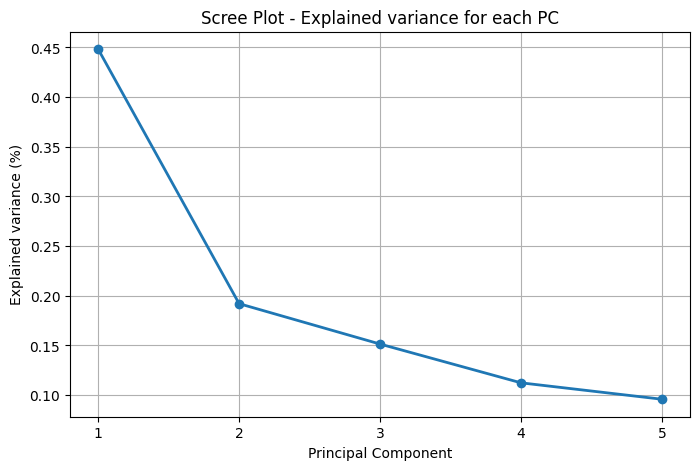

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Calcola la varianza spiegata in percentuale
explained_variance_ratio = pca.explained_variance / np.sum(pca.explained_variance)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-', linewidth=2)
plt.title('Scree Plot - Explained variance for each PC')
plt.xlabel('Principal Component')
plt.ylabel('Explained variance (%)')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


## Implementazione con sklearn

In [7]:
from sklearn.decomposition import PCA

pca_sklearn = PCA(n_components=5)
X_projected_sk = pca_sklearn.fit(X_scaled)
X_projected_sk = pca_sklearn.transform(X_scaled)

print("Original shape:", X.shape)
print("Shape after PCA:", X_projected_sk.shape)

Original shape: (159, 52)
Shape after PCA: (159, 5)


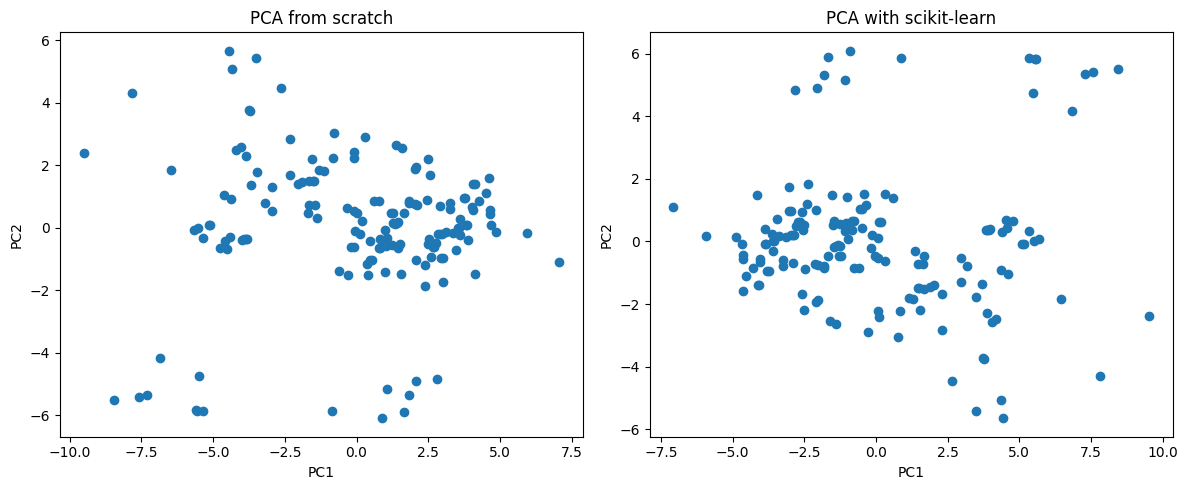

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X_projected[:, 0], X_projected[:, 1])
axs[0].set_title("PCA from scratch")
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")

axs[1].scatter(X_projected_sk[:, 0], X_projected_sk[:, 1])
axs[1].set_title("PCA with scikit-learn")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")

plt.tight_layout()
plt.show()


The two graphs coincide but are mirrored. This is because the two components PC1 and PC2 can be reversed in sign. With PCA you translate the data.

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# PCA with 5 components
pca = PCA(n_components=5)
pca.fit(X_scaled)

loadings = pca.components_.T
loadings = pd.DataFrame(loadings, 
                        columns=["PC1", "PC2", "PC3", "PC4", "PC5"], 
                        index=df.columns) 

print("Contribution of features to principal components:")
print(loadings)


Contribution of features to principal components:
                           PC1       PC2       PC3       PC4       PC5
price                 0.266710 -0.025282 -0.085747 -0.001369 -0.064647
highway-mpg          -0.238950  0.175763 -0.069308  0.059438  0.026949
city-mpg             -0.230698  0.199036 -0.058570  0.084956 -0.003319
peak-rpm             -0.070439 -0.216197 -0.046053 -0.228470  0.167938
horsepower            0.237717 -0.212239 -0.049170 -0.025990 -0.038889
compression-ratio     0.062106  0.355028 -0.185815  0.165973 -0.073249
stroke                0.037104  0.072150 -0.346133 -0.202846 -0.072766
bore                  0.207635 -0.023179  0.184756  0.104919 -0.013239
engine-size           0.257139 -0.080510 -0.101840  0.049202 -0.161666
num-of-cylinders      0.170659 -0.134712 -0.120149  0.072734 -0.233636
curb-weight           0.284805  0.000030 -0.027548  0.012799 -0.047996
height                0.112068  0.218449  0.193312 -0.169525  0.019581
width                 0.260

I choose the highest values in absolute value. The “-” indicates only the direction of the vector in space.
- PC1 is the first component, the one that explains most variance.
- PC2 is the second component, orthogonal to the first, explains the second most variance.
- The other components explain the rest of the variance.

It can be said that PC1 is a linear combination dominated by features such as curb-weight, length, width, engine-size.

## Rappresentazione dell'importanza delle features per PC1

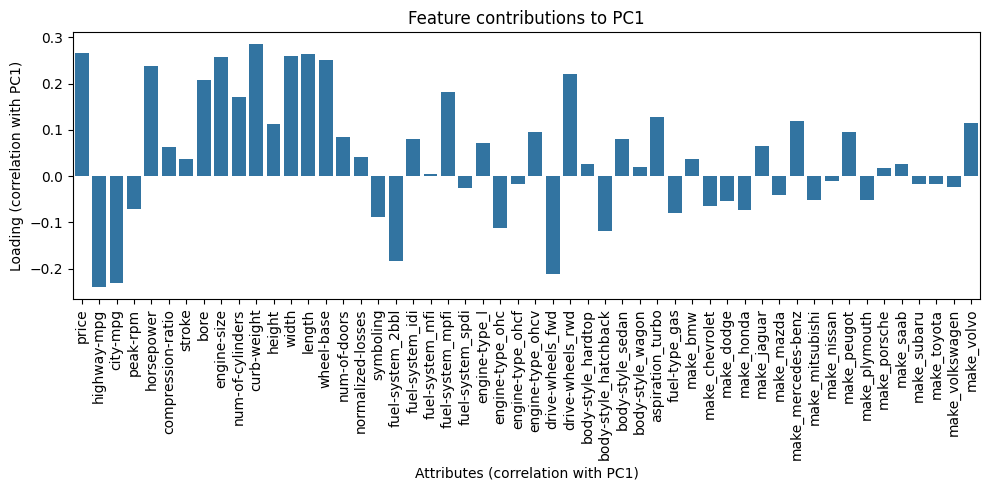

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=df.columns, y=loadings["PC1"])
plt.xticks(rotation=90)
plt.title("Feature contributions to PC1")
plt.xlabel("Attributes (correlation with PC1)")
plt.ylabel("Loading (correlation with PC1)")
plt.tight_layout()
plt.show()

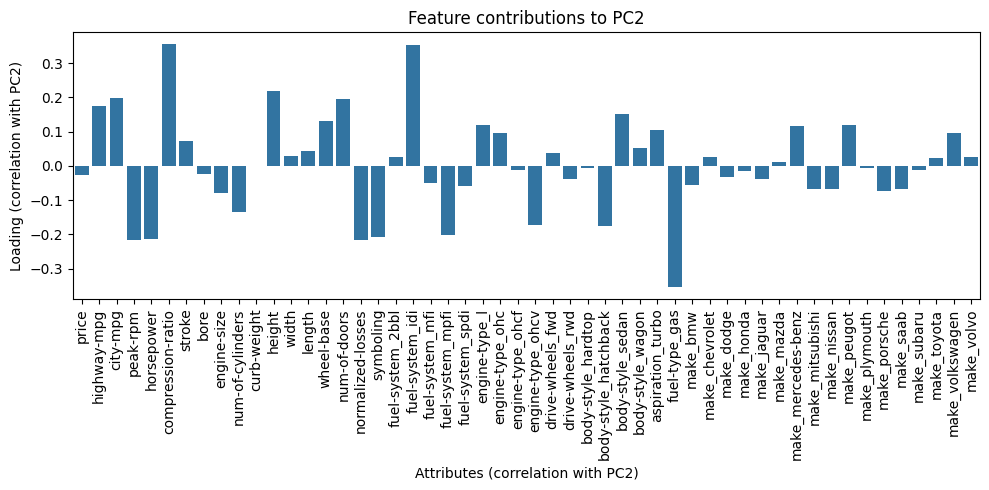

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=df.columns, y=loadings["PC2"])
plt.xticks(rotation=90)
plt.title("Feature contributions to PC2")
plt.xlabel("Attributes (correlation with PC2)")
plt.ylabel("Loading (correlation with PC2)")
plt.tight_layout()
plt.show()